In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

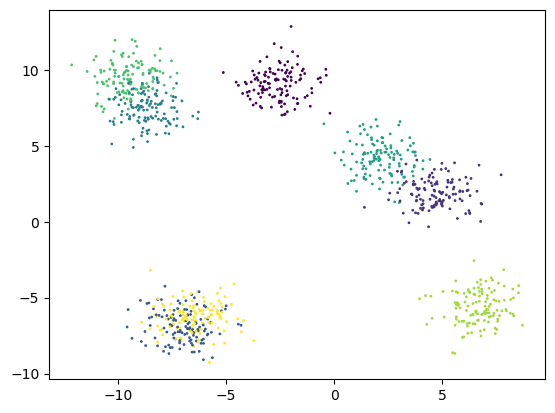

In [18]:
centers = 8  # n centers of points produced
n_samples = 1000  # number of points produced

# Dataset where X is the coordinate and y are the labels
X, y = make_blobs(n_samples=n_samples, centers=centers, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=1)

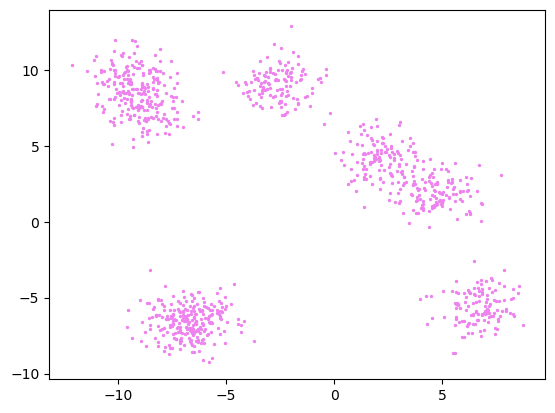

In [29]:
# With random_state=42, we see that even though there are 8 centers
# We can only make out 5 or 6 without the labels
plt.scatter(X[:, 0], X[:, 1], c='violet', s=2)

In [20]:
# Iteration and metrics
metrics = {'wcss': [],
           'silhouette': [],
           'db_index': [],
           'ch_index': []}
labels = []
cluster_centers = []
n_clusters = 14  # upper range of clusters to test
for k in range(2, n_clusters):
    # Kmeans fit
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(X)
    labels.append(kmeans.labels_)
    cluster_centers.append(kmeans.cluster_centers_)

    # Within cluster sum of squares
    metrics['wcss'].append(kmeans.inertia_)

    # Silhouette coefficient
    silhouette = silhouette_score(X, labels[-1])
    metrics['silhouette'].append(silhouette)

    # Davies-Bouldin index
    db_index = davies_bouldin_score(X, labels[-1])
    metrics['db_index'].append(db_index)

    # Calinski-Harabasz index
    ch_index = calinski_harabasz_score(X, labels[-1])
    metrics['ch_index'].append(ch_index)

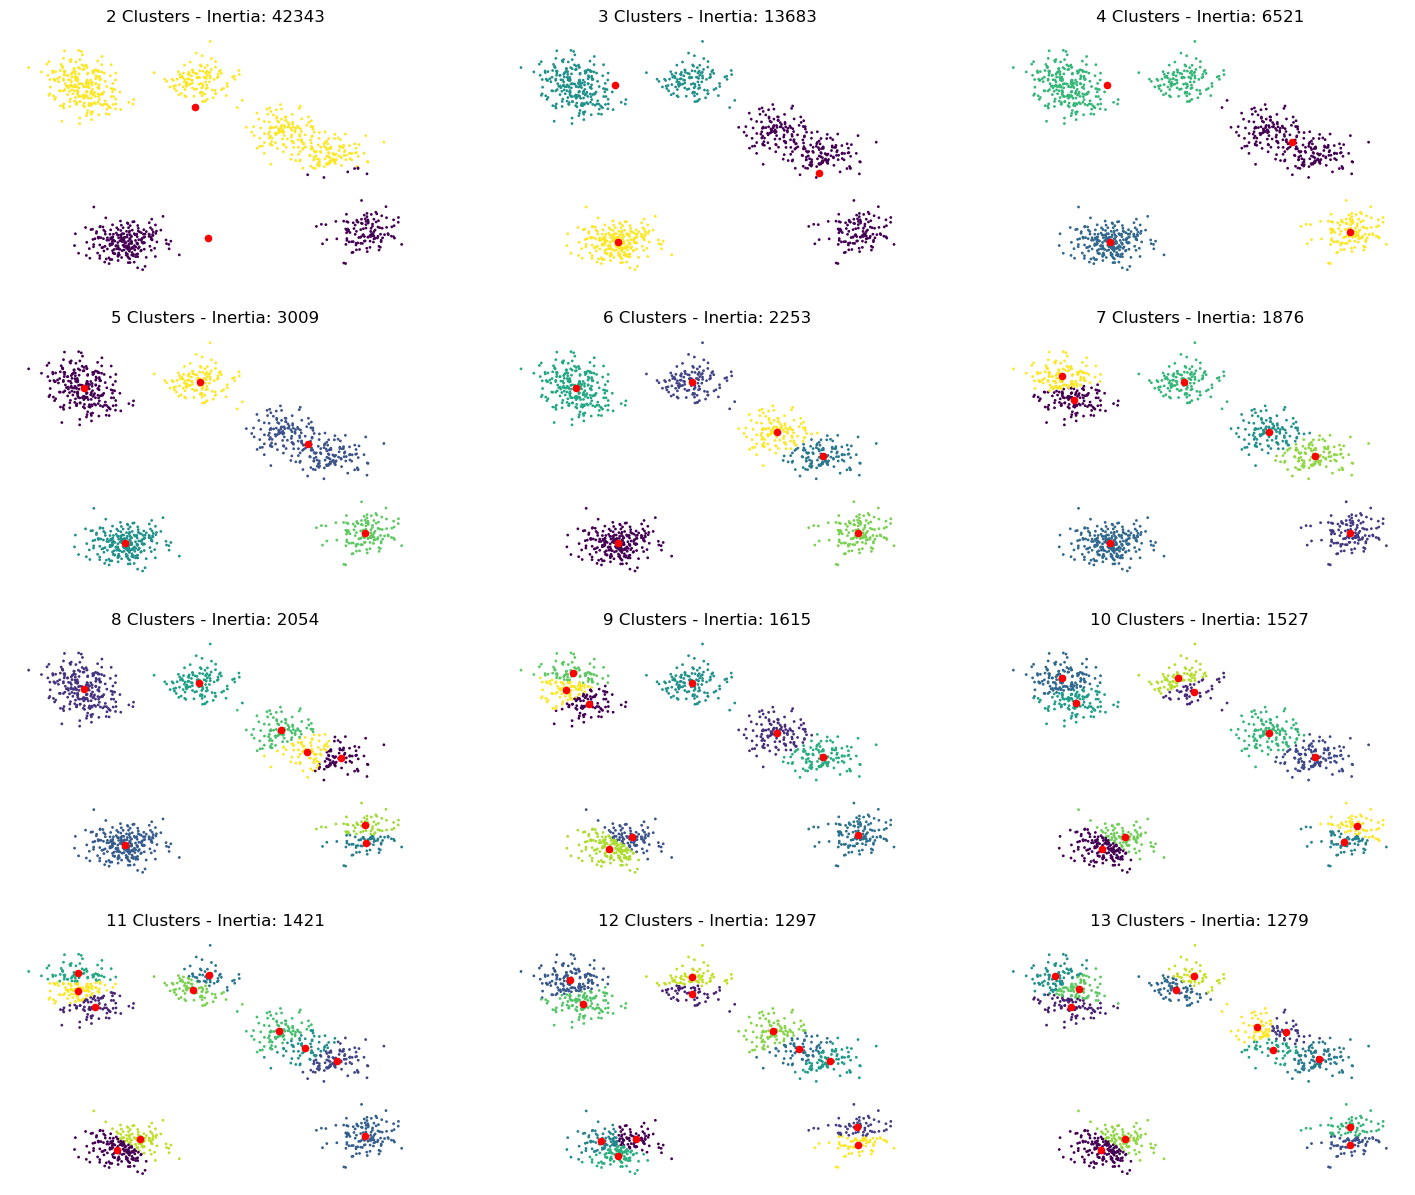

In [ ]:
# The plots of increasing number of clusters
cols = 3
rows = n_clusters // cols
fig, axes = plt.subplots(rows, cols, figsize=(18, 15))

for i, label, center, inertia in zip(range(len(labels)), labels, cluster_centers, metrics['wcss']):
    ax = axes.flatten()[i]
    ax.scatter(X[:, 0], X[:, 1], c=label, cmap='viridis', s=1)
    ax.scatter(center[:, 0], center[:, 1], marker='o', c='red', s=20)
    ax.set(title=f'{len(center)} Clusters - Inertia: {round(inertia)}')
    ax.legend([], [], frameon=False)
    ax.axis('off')
plt.show()

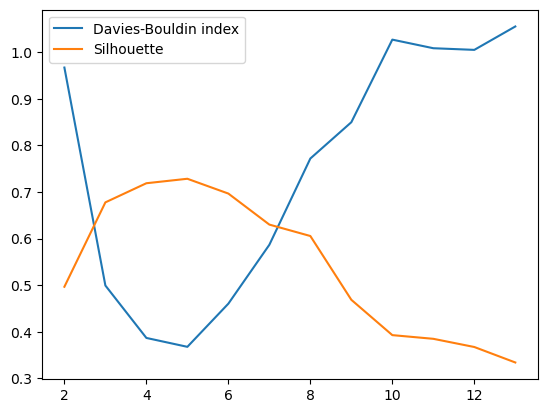

In [22]:
# lower is better
plt.plot(range(2, n_clusters), metrics['db_index'], label='Davies-Bouldin index')
# the higher, the better
plt.plot(range(2, n_clusters), metrics['silhouette'], label='Silhouette')
plt.legend()

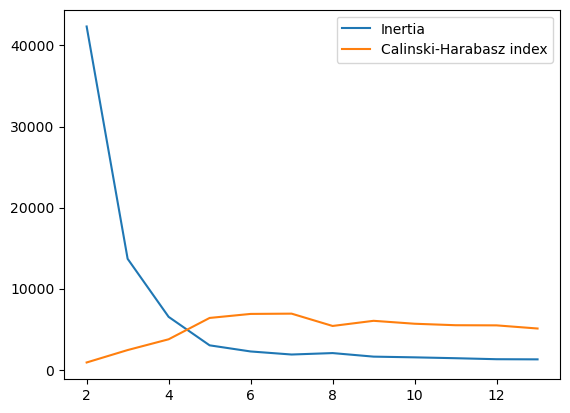

In [23]:
# lower is better
plt.plot(range(2,n_clusters), metrics['wcss'], label='Inertia')
# the higher, the better
plt.plot(range(2,n_clusters), metrics['ch_index'], label='Calinski-Harabasz index')
plt.legend()

In [12]:
# Going back to the grid of clusters, we can see that 5 or 6 are the best approximation for our dataset